In [ ]:
 # imports
! pip install scikit-plot
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics 
import scikitplot as skplt

# color maps
from matplotlib import cm

In [ ]:
ok_num = pd.read_csv('https://raw.githubusercontent.com/CarolineGuothesweetie/OkCupid/main/numecial.csv')

In [ ]:
ok_num.sample(5)

,id,age,status,sex,orientation,drinks,drugs,education,height,income,offspring,smokes
2766,18434,56,0,0,0,2,1,1,71.0,0,3,0
4011,26524,37,0,0,0,3,1,1,69.0,0,1,0
6548,43225,39,0,0,0,2,0,5,67.0,0,1,0
4758,31002,29,0,1,2,3,1,1,68.0,0,0,1
8621,56968,29,0,0,0,2,0,1,74.0,0,1,0


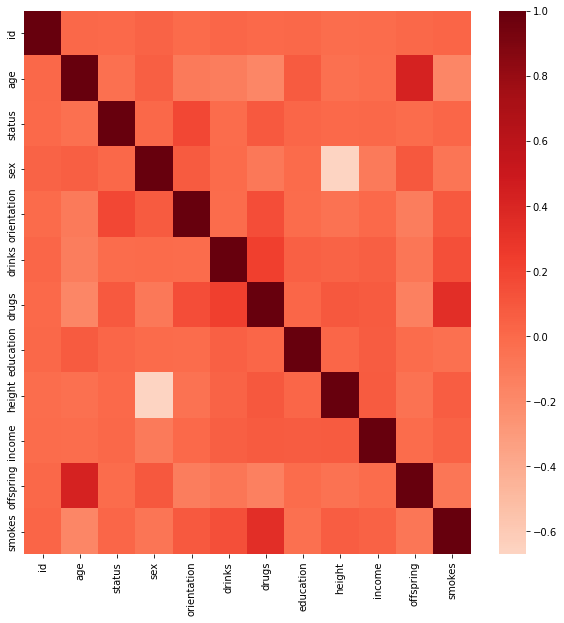

In [ ]:
# correlation matrix
ok_numcor = ok_num.corr()

plt.figure(figsize=(10, 10))

sns.heatmap(ok_numcor, cmap = 'Reds', center = 0)

In [ ]:
ok_num.describe().T

,count,mean,std,min,25%,50%,75%,max
id,9055.0,29898.146438,17343.578544,0.0,15007.0,29603.0,44751.5,59944.0
age,9055.0,34.470237,11.422735,18.0,26.0,31.0,41.0,69.0
status,9055.0,0.115958,0.450099,0.0,0.0,0.0,0.0,3.0
sex,9055.0,0.458421,0.498296,0.0,0.0,0.0,1.0,1.0
orientation,9055.0,0.187852,0.518645,0.0,0.0,0.0,0.0,2.0
drinks,9055.0,1.830701,0.795633,0.0,2.0,2.0,2.0,5.0
drugs,9055.0,0.214136,0.440870,0.0,0.0,0.0,0.0,2.0
education,9055.0,1.517725,1.200697,0.0,1.0,1.0,2.0,6.0
height,9055.0,68.063943,3.991818,43.0,65.0,68.0,71.0,95.0
income,9055.0,28827.167311,111090.118442,0.0,0.0,0.0,20000.0,1000000.0


In [ ]:
scaler = StandardScaler()
scaler.fit(ok_num)
df_scaled = scaler.transform(ok_num)
type(df_scaled)

numpy.ndarray

In [ ]:
# fit our first PCA model
pca = PCA()
pcs = pca.fit_transform(df_scaled)
print(type(pca))
print(type(pcs))

# same shape
pcs.shape

<class 'sklearn.decomposition._pca.PCA'>
<class 'numpy.ndarray'>


(9055, 12)

In [ ]:
varexp = pca.explained_variance_ratio_
print(type(varexp))
print(varexp.shape)

<class 'numpy.ndarray'>
(12,)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


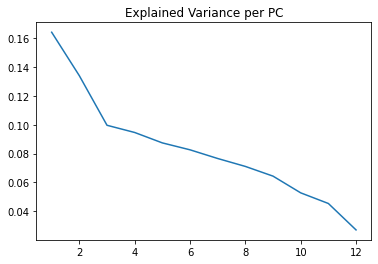

In [ ]:
# plot the variance explained by the PC
plt.title('Explained Variance per PC')
sns.lineplot(range(1, len(varexp)+1), varexp)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


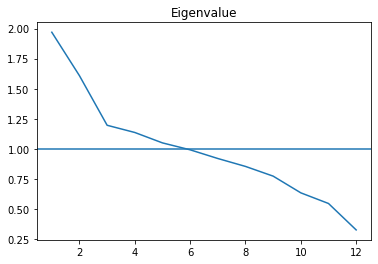

In [ ]:
# explained variance - eigenvalue
explvar = pca.explained_variance_

plt.title('Eigenvalue')
sns.lineplot(range(1, len(varexp)+1), explvar)
plt.axhline(1)

# Eigenvalue = 1 => meaningful amount of info explained, threshold

In [ ]:
print(pca.n_components_)

COLS = ['PC' + str(i) for i in range(1, len(varexp)+1)]
COLS

comps = pca.components_

loadings = pd.DataFrame(comps.T, columns=COLS, index = ok_num.columns)
loadings

12


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
id,-0.020366,0.059696,0.165098,-0.083847,-0.150330,0.961565,0.096974,-0.017214,-0.054652,0.038002,-0.012782,-0.015242
age,-0.383534,-0.281758,0.430950,0.152680,-0.141935,-0.075673,-0.073956,-0.078926,-0.163383,0.200070,0.678369,-0.002659
status,0.089597,0.160687,0.116357,0.678848,-0.001862,0.078730,-0.099262,0.524676,0.435513,-0.071273,0.075196,-0.005677
sex,-0.397052,0.553446,0.083776,-0.108279,0.054653,-0.050175,0.056870,0.007374,0.048967,0.014573,-0.000283,0.711268
orientation,0.141269,0.335003,0.008168,0.546987,-0.016570,-0.013639,0.022053,-0.296495,-0.664254,-0.182603,-0.052685,-0.048428
drinks,0.245151,0.156428,0.345481,-0.393033,0.055934,-0.064179,-0.267743,0.580909,-0.393418,-0.244282,0.092608,-0.046707
drugs,0.420197,0.224905,0.333411,-0.017214,-0.172480,-0.115467,-0.064782,-0.098446,0.044056,0.759897,-0.157898,0.010318
education,0.000249,-0.050527,0.371222,0.037892,0.686231,0.100374,-0.447500,-0.348707,0.169833,-0.096289,-0.130537,-0.014525
height,0.392130,-0.547837,-0.027339,0.133040,-0.079142,0.063234,-0.103948,0.008988,-0.119214,-0.067490,-0.044283,0.696983
income,0.154720,-0.092368,0.317873,0.013222,0.417732,-0.059937,0.823651,0.087938,-0.017264,-0.023577,0.027819,0.021404


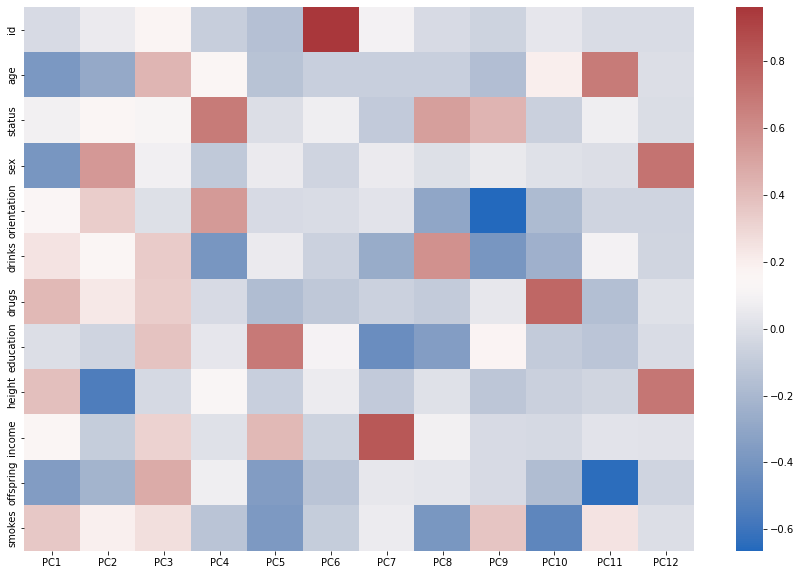

In [ ]:
plt.figure(figsize=(15, 10))

sns.heatmap( l )